In [1]:
import pandas as pd
df = pd.read_csv('TaxiFlota.csv' , encoding = 'latin-1', sep = ";")
df.head(10)

,Código,Matrícula,Fecha Matriculación,Marca,Modelo,Tipo,Variante,Clasificación medioambiental,Combustible,Cilindrada,Potencia,Número de Plazas,Fecha inicio de prestación del servicio de taxi,Eurotaxi,Régimen Especial de Eurotaxi,Fecha inicio Régimen Especial Eurotaxi,Fecha fin Régimen Especial Eurotaxi,Fecha
0,1020144,2239DTJ,13/12/2005,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.00,NaN,16/12/2005,NO,NO,NaN,NaN,30/07/2018
1,550040,8901GJP,21/11/2008,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.00,NaN,11/12/2008,NO,NO,NaN,NaN,30/07/2018
2,550016,6364FVW,14/12/2007,SEAT,TOLEDO,NaN,NaN,NaN,DIESEL,0,12.00,NaN,18/11/2008,NO,NO,NaN,NaN,30/07/2018
3,550115,4249GST,08/01/2010,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.00,NaN,14/01/2010,NO,NO,NaN,NaN,30/07/2018
4,550142,1561GVY,27/04/2010,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.00,NaN,01/03/2010,NO,NO,NaN,NaN,30/07/2018
5,550214,6296HBZ,28/02/2011,SKODA,OCTAVIA,1Z,AACAYCX01/NFM5,NaN,DIESEL,0,11.64,NaN,03/08/2012,NO,NO,NaN,NaN,30/07/2018
6,550241,9097GYH,16/08/2010,VOLKSWAGEN,PASSAT,3C,AACBBBX0/FM6FM6*******,NaN,DIESEL,0,13.00,NaN,10/01/2013,NO,NO,NaN,NaN,30/07/2018
7,550244,3091HJM,29/02/2012,PEUGEOT,508,8,8D9HRB/PS,NaN,DIESEL,0,82.00,NaN,23/08/2013,NO,NO,NaN,NaN,30/07/2018
8,1198109,0800GZC,18/10/2010,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110.00,5,25/10/2010,NO,NO,NaN,NaN,30/07/2018
9,1196804,7686GYS,23/09/2010,CHEVROLET,EPICA,KLAL,LV1/111,C,GASOLINA TRANSFORMADO GLP,1993,105.00,5,04/10/2010,NO,NO,NaN,NaN,30/07/2018


In [2]:
# 1. Renombrar columnas 
# 1.1 Cambiar los títulos a minúsculas

df.columns = df.columns.str.lower()
df

# 1.2 Sustituir espacios por "_"
df.columns = df.columns.str.replace(' ','_')

# 1.3 Quitar tildes
df.columns = df.columns.str.replace("á", "a").str.replace("é", "e").str.replace("í", "i").str.replace("ó", "o").str.replace("ú", "u")

# 1.4 Renombrar manualmente las columnas con nombres más cortos
df = df.rename(columns= {'numero_de_plazas':'numero_plazas',
                   'fecha_inicio_de_prestacion_del_servicio_de_taxi':'fecha_inicio', 
                   'regimen_especial_de_eurotaxi':'regimen_eurotaxi', 
                   'fecha_inicio_regimen_especial_eurotaxi':'fecha_inicio_eurotaxi', 
                   'fecha_fin_regimen_especial_eurotaxi':'fecha_fin_eurotaxi'})

# 1.5 Comprobar nombre de columnas
df.columns

Index(['codigo', 'matricula', 'fecha_matriculacion', 'marca', 'modelo', 'tipo',
       'variante', 'clasificacion_medioambiental', 'combustible', 'cilindrada',
       'potencia', 'numero_plazas', 'fecha_inicio', 'eurotaxi',
       'regimen_eurotaxi', 'fecha_inicio_eurotaxi', 'fecha_fin_eurotaxi',
       'fecha'],
      dtype='object')

In [3]:
# 2. Convertir variables
# 2.1 Inspeccionar el tipo de variables
df.dtypes

codigo                            int64
matricula                        object
fecha_matriculacion              object
marca                            object
modelo                           object
tipo                             object
variante                         object
clasificacion_medioambiental     object
combustible                      object
cilindrada                        int64
potencia                        float64
numero_plazas                    object
fecha_inicio                     object
eurotaxi                         object
regimen_eurotaxi                 object
fecha_inicio_eurotaxi            object
fecha_fin_eurotaxi               object
fecha                            object
dtype: object

In [4]:
## 2.2 Identificar las variables a cambiar
# codigo -> object
df.codigo = df.codigo.astype('object')

In [5]:
# matricula - > OK

In [6]:
# fecha_matriculación -> date

from datetime import date, datetime
import re
formato = '%d/%m/%Y'

def parsea_fecha(fecha):
    try:
        a = datetime.strptime(fecha,formato)
        return a
    except:
        return None

df.fecha_matriculacion = df.fecha_matriculacion.apply(parsea_fecha)

In [7]:
# marca -> OK
# modelo -> OK
# tipo -> OK
# variante -> OK

In [8]:
# clasificacion_medioambiental -> category
df["clasificacion_medioambiental"] = pd.Categorical(df["clasificacion_medioambiental"], ["0", "Eco", "C", "B"])
df["clasificacion_medioambiental"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: clasificacion_medioambiental, dtype: category
Categories (4, object): [0, Eco, C, B]

In [9]:
# combustible -> OK
# cilindrada -> OK

In [10]:
# potencia -> float

def a_numero(numero):
    try:
        a = pd.to_numeric(numero)
        return a
    except:
        return None

df.potencia = df.potencia.apply(a_numero)
df.head()

,codigo,matricula,fecha_matriculacion,marca,modelo,tipo,variante,clasificacion_medioambiental,combustible,cilindrada,potencia,numero_plazas,fecha_inicio,eurotaxi,regimen_eurotaxi,fecha_inicio_eurotaxi,fecha_fin_eurotaxi,fecha
0,1020144,2239DTJ,2005-12-13,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.0,NaN,16/12/2005,NO,NO,NaN,NaN,30/07/2018
1,550040,8901GJP,2008-11-21,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.0,NaN,11/12/2008,NO,NO,NaN,NaN,30/07/2018
2,550016,6364FVW,2007-12-14,SEAT,TOLEDO,NaN,NaN,NaN,DIESEL,0,12.0,NaN,18/11/2008,NO,NO,NaN,NaN,30/07/2018
3,550115,4249GST,2010-01-08,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.0,NaN,14/01/2010,NO,NO,NaN,NaN,30/07/2018
4,550142,1561GVY,2010-04-27,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.0,NaN,01/03/2010,NO,NO,NaN,NaN,30/07/2018


In [11]:
# numero_plazas -> int

# num_plazas se puede crear una nueva columna que ponga el número de plazas para mobilidad reducida y
# luego añadir una columna con numero de plazas total
df.numero_plazas.value_counts()

5                           45515
7                             551
de 5+1PMR a 7 plazas (*)      250
6                             192
9                             164
5 + 1 PMR                     117
de 5+1PMR a 9 plazas (*)       66
8                              39
5+1PMR                          6
5+2PMR                          6
de 6+1PMR a 9 plazas (*)        3
7+1PMR                          3
de 5+1PMR a 8 plazas (*)        3
de 6+1PMR a 8 plazas (*)        3
Name: numero_plazas, dtype: int64

In [58]:
import numpy as np
def partidor_magico(tmp):
    print(tmp)
    if not isinstance(tmp,str) or np.isnan(tmp):
        return ['0','0','0']
    a = re.findall('[0-9]+',tmp)
    if len(re.findall('[0-9]+',tmp)) == 1:
        a.append('0')
        a.append('0')
        print(a)
    elif len(re.findall('[0-9]+',tmp)) == 2:
        a.append('0')
        print(a)
    elif len(re.findall('[0-9]+',tmp)) == 3:
        print(a)
    else:
        print('0')
    return a


df['prueba'] = df.numero_plazas.apply(lambda x: partidor_magico(x)[0])
df.prueba.head()

nan
nan
nan
5


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [13]:
# fecha_inicio -> date
df.fecha_inicio = df.fecha_inicio.apply(parsea_fecha)

In [14]:
# eurotaxi -> obj
df.eurotaxi = df.eurotaxi.replace('SI', '1')
df.eurotaxi = df.eurotaxi.replace('NO', '0')

In [15]:
# regimen_eurotaxi -> obj
df.regimen_eurotaxi = df.regimen_eurotaxi.replace('SI','1')
df.regimen_eurotaxi = df.regimen_eurotaxi.replace('NO','0')

In [16]:
# fecha_inicio_eurotaxi -> date
df.fecha_inicio_eurotaxi= df.fecha_inicio_eurotaxi.apply(parsea_fecha)

In [17]:
# fecha_fin_eurotaxi -> date
df.fecha_fin_eurotaxi = df.fecha_fin_eurotaxi.apply(parsea_fecha)

In [18]:
# fecha -> date
df.fecha = df.fecha.apply(parsea_fecha)

In [47]:
#eliminamos columnas inservibles y ordenamos por fecha de matriculación
df = df.drop(['tipo','variante','fecha_inicio_eurotaxi','fecha_fin_eurotaxi','fecha'],axis=1)
df = df.sort_values(by='fecha_matriculacion')
df.head()

,codigo,matricula,fecha_matriculacion,marca,modelo,clasificacion_medioambiental,combustible,cilindrada,potencia,numero_plazas,fecha_inicio,eurotaxi,regimen_eurotaxi
0,1020144,2239DTJ,2005-12-13,SKODA,OCTAVIA,NaN,DIESEL,0,12.0,NaN,2005-12-16,0,0
15646,1020144,2239DTJ,2005-12-13,SKODA,OCTAVIA,NaN,DIESEL,0,12.0,NaN,2005-12-16,0,0
31294,1020144,2239DTJ,2005-12-13,SKODA,OCTAVIA,NaN,DIESEL,0,12.0,NaN,2005-12-16,0,0
39451,1067525,8924FKG,2007-01-08,SKODA,OCTAVIA 1.9 TDI 5v man (2005),B,DIESEL,1896,77.0,5,2007-01-10,0,0
23654,1067525,8924FKG,2007-01-08,SKODA,OCTAVIA 1.9 TDI 5v man (2005),B,DIESEL,1896,77.0,5,2007-01-10,0,0


In [19]:
# 2.3 Confirmar cambios
df.dtypes


codigo                                  object
matricula                               object
fecha_matriculacion             datetime64[ns]
marca                                   object
modelo                                  object
tipo                                    object
variante                                object
clasificacion_medioambiental          category
combustible                             object
cilindrada                               int64
potencia                               float64
numero_plazas                           object
fecha_inicio                    datetime64[ns]
eurotaxi                                object
regimen_eurotaxi                        object
fecha_inicio_eurotaxi           datetime64[ns]
fecha_fin_eurotaxi              datetime64[ns]
fecha                           datetime64[ns]
dtype: object

In [42]:

df_2 = pd.read_csv('TaxiModelos.csv' , encoding = 'latin-1', sep = ";")
df_2.head(10)


,Marca,Modelo,Tipo,Contraseña de Homologación,Variante,Versión,Parte Fija Vin,Combustible,Eurotaxi,Cilindrada,Potencia,Tipo de Cambio,Nº Plazas,Mampara s/n,Comercializado s/n,Clasificación D.G.T.
0,CITROEN,CITROEN C-ELYSEE eco-glv,FE-CO1,e9*NKS*10152*00,FE14,FE14C1,VF7DDNFP0,GLP / GASOLINA,NO,1587,85.0,MANUAL 5V,5,SI,NO,ECO
1,CITROEN,CITROEN C-ELYSEE eco-glv,FE-CO1/1,e9*NKS*10153*00,FE14C,FE14C1C,VF7DDNFP0,GLP / GASOLINA,NO,1587,85.0,MANUAL 5V,5,SI,NO,ECO
2,CITROEN,CITROEN C-ELYSEE eco-glv,FE-CO2,e9*NKS*10331*00,FE15,FE15C1,VF7DDNFP6,GLP / GASOLINA,NO,1587,85.0,MANUAL 5V,5,SI,NO,ECO
3,CITROEN,CITROEN C-ELYSEE eco-glv,FECO2/1,e9*NKS*10332*00,FE15C,FE15C1C,VF7DDNFP6,GLP / GASOLINA,NO,1587,85.0,MANUAL 5V,5,SI,NO,ECO
4,CITROEN,CITROEN C-ELYSEE eco-glv,F,e9*KS07/46*6445*00,FECE,M/1,VF7DDNFP6,GLP / GASOLINA,NO,1587,85.0,MANUAL 5V,5,SI,SI,ECO
5,CITROEN,CITROEN C-ELYSEE eco-glv,F,e9*KS07/46*6445*00,FECE,M,VF7DDNFP6,GLP / GASOLINA,NO,1587,85.0,MANUAL 5V,5,SI,SI,ECO
6,CITROEN,CITROEN C-ELYSEE eco-glv,F,e9*KS07/46*6445,FECE,M/1,VF7DDNFP6,GLP / GASOLINA,NO,1587,85.0,MANUAL 5V,5,SI,SI,ECO
7,CITROEN,CITROEN C-ELYSEE eco-glv,F,e9*KS07/46*6445,FECE,M,VF7DDNFP6,GLP / GASOLINA,NO,1587,85.0,MANUAL 5V,5,SI,SI,ECO
8,DACIA,LODGY,SD,e2*2001/116*0314,JSDNV,JSDNV5,UU1JSDNV5,GLP / GASOLINA,NO,1598,75.0,MANUAL 6V,5,NO,NO,ECO
9,DACIA,LODGY,SD,e2*2001/116*0314,JSDJ3,JSDJ35,UU1JSDJ35,GLP / GASOLINA,NO,1598,60.5,MANUAL 6V,5,NO,NO,ECO


In [43]:
# 1. Renombrar columnas 
# 1.1 Cambiar los tÌtulos a min˙sculas

df_2.columns = df_2.columns.str.lower()

# 1.2 Sustituir espacios por "_"
df_2.columns = df_2.columns.str.replace(' ','_')


# 1.3 Quitar tildes
df_2.columns = df_2.columns.str.replace("á", "a").str.replace("é", "e").str.replace("í", "i").str.replace("ó", "o").str.replace("ú", "u").str.replace("ñ", "n")

# 1.4 Renombrar manualmente las columnas con nombres m·s largos
df_2 = df_2.rename(columns= {'contrasena_de_homologacion':'constrasena_homologacion',
                   'tipo_de_cambio':'tipo_cambio', 
                   'n∫_plazas':'n_plazas', 
                   'mampara_s/n':'mampara', 
                   'comercializado_s/n':'comercializado',
                   'clasificacion_d.g.t.':'clasificacion_dgt'})

# 1.5 Comprobar nombre de columnas
df_2.columns

Index(['marca', 'modelo', 'tipo', 'constrasena_homologacion', 'variante',
       'version', 'parte_fija_vin', 'combustible', 'eurotaxi', 'cilindrada',
       'potencia', 'tipo_cambio', 'nº_plazas', 'mampara', 'comercializado',
       'clasificacion_dgt'],
      dtype='object')

In [44]:
# 2. Convertir variables
# 2.1 Inspeccionar el tipo de variables
df_2.dtypes

marca                        object
modelo                       object
tipo                         object
constrasena_homologacion     object
variante                     object
version                      object
parte_fija_vin               object
combustible                  object
eurotaxi                     object
cilindrada                    int64
potencia                    float64
tipo_cambio                  object
nº_plazas                    object
mampara                      object
comercializado               object
clasificacion_dgt            object
dtype: object

In [23]:
# 2.2 Identificar las variables a cambiar

# marca -> OK

# modelo -> OK

# tipo -> OK

# contrasena_homologacion -> OK

# variante -> OK

# version -> OK

# parte_fija_vin -> OK

# combustible -> OK

In [45]:
# eurotaxi -> OK (cambiar si y no por 1 y 0)
df_2.eurotaxi = df_2.eurotaxi.replace('SI','1')
df_2.eurotaxi = df_2.eurotaxi.replace('NO','0')

In [25]:
# cilindrada -> OK

# potencia -> OK

# tipo_cambio -> OK

# n_plazas -> cambiar


In [26]:
# mampara -> OK (cambiar si y no por 1 y 0)
df_2.mampara = df_2.mampara.replace('SI','1')
df_2.mampara = df_2.mampara.replace('NO','0')

In [27]:
# comercializado -> OK (cambiar si y no por 1 y 0)
df_2.comercializado = df_2.comercializado.replace('SI','1')
df_2.comercializado = df_2.comercializado.replace('NO','0')

In [28]:
# clasificacion_medioambiental -> category
df_2["clasificacion_dgt"] = pd.Categorical(df_2["clasificacion_dgt"], ["0", "Eco", "C", "B"])
df_2.clasificacion_dgt.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: clasificacion_dgt, dtype: category
Categories (4, object): [0, Eco, C, B]

In [29]:
# 2.3 Confirmar cambios
df_2.dtypes

marca                         object
modelo                        object
tipo                          object
constrasena_homologacion      object
variante                      object
version                       object
parte_fija_vin                object
combustible                   object
eurotaxi                      object
cilindrada                     int64
potencia                     float64
tipo_cambio                   object
nº_plazas                     object
mampara                       object
comercializado                object
clasificacion_dgt           category
dtype: object

In [30]:
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 14, 10
sns.set_context('talk')


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


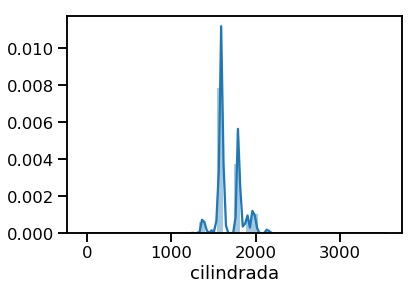

In [31]:
#distribución cilindrada
out = sns.distplot(df.cilindrada)

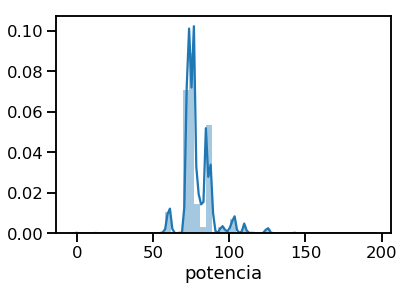

In [32]:
#distribución de la potencia 
df.potencia.fillna(df.potencia.mean(),inplace=True)
sns.distplot(df.potencia)

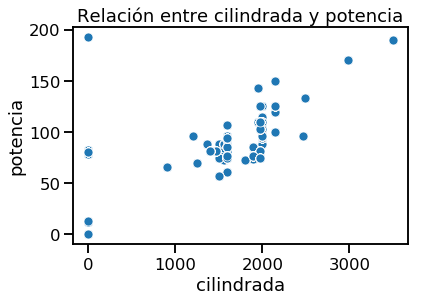

In [33]:
grafico1 = sns.scatterplot(x='cilindrada', y='potencia', data=df).set_title('Relación entre cilindrada y potencia')

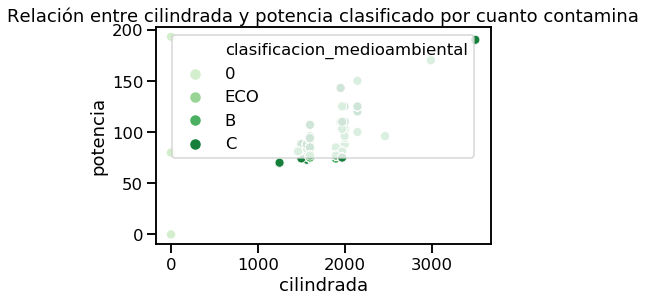

In [34]:
grafico2 = sns.scatterplot(x='cilindrada', y='potencia', data=df, hue = 'clasificacion_medioambiental',legend='brief', hue_order= ['0', 'ECO', 'B', 'C'], palette="Greens").set_title('Relación entre cilindrada y potencia clasificado por cuanto contamina')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

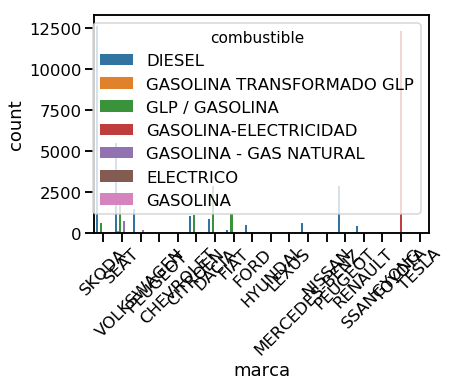

In [35]:
out = sns.countplot(x='marca', hue='combustible', data=df)
plt.xticks(rotation=45)

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


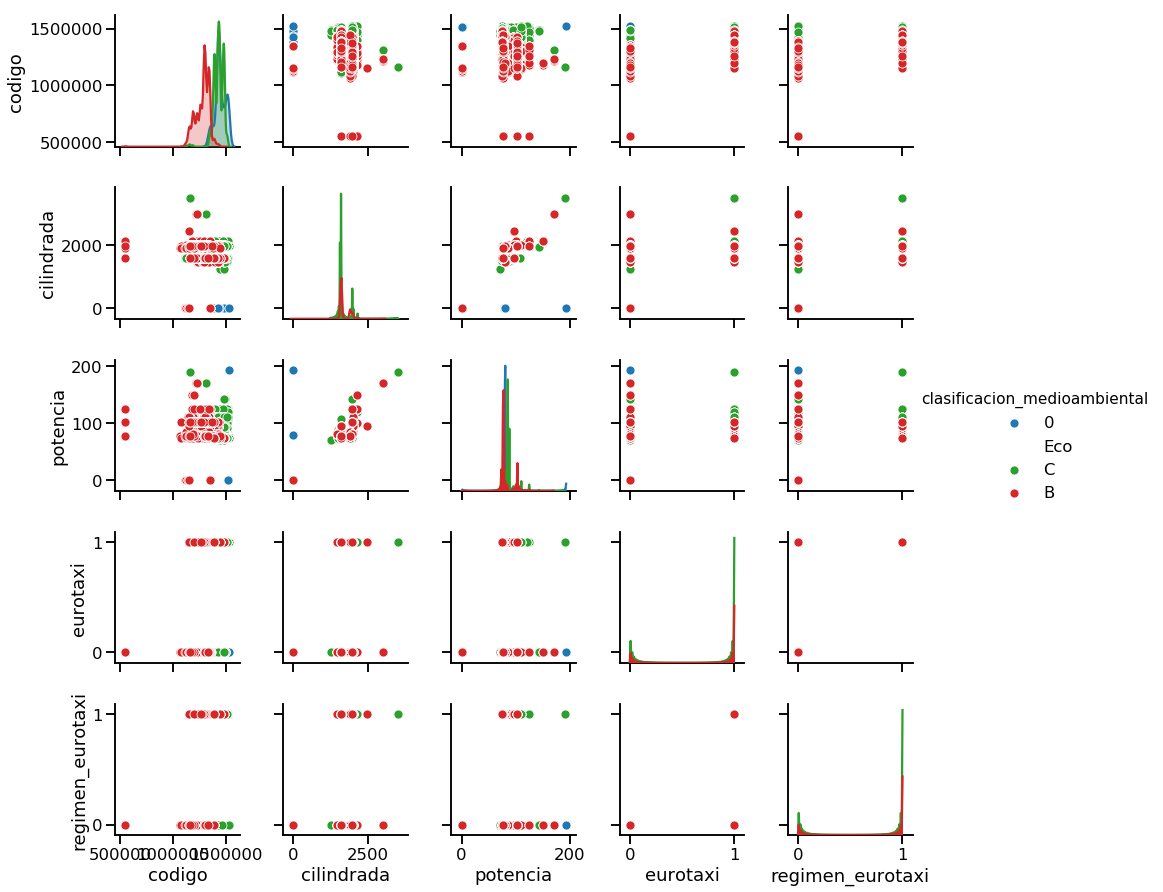

In [36]:
out = sns.pairplot(df, hue='clasificacion_medioambiental')